In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import contingency_matrix
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv("data_final.csv")
k = 5
df = df.sample(25000)
X = df.iloc[:,0:14].values

In [20]:
Y = []
for i in df['xAttack']:
    if i=="normal":
        Y.append(0)
    elif i=="dos":
        Y.append(1)
    elif i=="r2l":
        Y.append(2)
    elif i=="probe":
        Y.append(3)
    elif i=="u2r":
        Y.append(4)
Y = np.array(Y)
# Y = Y[0:10000]

In [21]:
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')  
labels = cluster.fit_predict(X)  

In [22]:
cont = contingency_matrix(labels,Y)

In [23]:
ans = 0
for i in cont:
    ans = ans + max(i)
purity = ans/len(df)
purity

0.53272

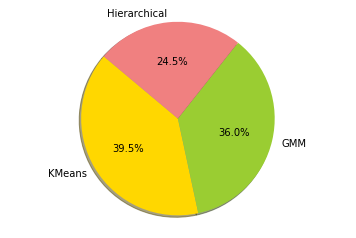

In [24]:
labels =  'KMeans', 'GMM', 'Hierarchical',
sizes = [86.86241496193628, 79.10892810364126, 54]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()